Uncomment the following cell to install the required library

In [1]:
# Install necessary libraries located in requirements.txt file
# !pip install -r requirements.txt

In [2]:
# Import necesary Libraries
import requests
from bs4 import BeautifulSoup
import pandas as pd
from protego import Protego
import time
import logging
from typing import List, Dict
import matplotlib.pyplot as plt
import re

# <ins>Assignment</ins>

- Given the attached list of domains could you write a simple scraper (in either NodeJS or Python) that would get us and store social links of the specific company (Twitter URL, Linkedin URL, ...).
- Using a database of your choice could you create a data model of the company data and of the information we can get from TWO of the sources you just retrieved?
- How often would you update the info that you're getting from the sources you chose?
- What other information do you think you could get from the companies' websites in a consistent manner? How would you store it or add it to the data model?

# <ins>SOLUTION 1</ins>

Given the attached list of domains could you write a simple scraper (in either NodeJS or Python) that would get us and store social links of the specific company (Twitter URL, Linkedin URL, ...)?

For this Assignment, my preferred language of choice is Python. 

My implemented scraping script can be found in `scraper.py`, and the scraped results are stored in `scraping_results.csv` file. Below is a detailed explanation of the steps taken while building the Scraper. I focused on trying to collect Social Media handles like: 

    Facebook, Twitter ,Youtube, Instagram, Linkedin, Medium, Weibo, and Snapchat if present on the page.


## Load Data

In [3]:
# Read the Data in using Pandas
df = pd.read_csv('./specter_hw/sample_domains.csv')

In [4]:
# Get a headshot of the Data 
df.head(5)

,domain
0,squareup.com
1,nih.gov
2,mi.com
3,gojek.io
4,quibi.com


## Basic Scraper 

- ### Beautifulsoup + requests

In [5]:
def get_social_media_link(scraped_media_list: List, social_media_names: str) -> Dict:
    result = {}
    social_media_pattern = re.compile(f"({social_media_names})")
    social_media_platforms = list(filter(lambda scraped_url: re.search(social_media_pattern,
                                                                       scraped_url) , scraped_media_list))
    
    for social_media_platform in social_media_platforms:
        social_media_match = re.search(social_media_pattern, social_media_platform)
        if re.search(social_media_pattern, social_media_platform):
            result[social_media_match.group(1)] = social_media_platform.lower()

    return result


def a_href_checker(domain:str) -> Dict:
    HEADERS = {
        'User-Agent': 'Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/81.0.4044.92 Safari/537.36',
    }
    
    temp_result = {}
    response = None
    social_media_names = "facebook|twitter|youtube|instagram|linkedin|medium|weibo|snapchat"
    logging.basicConfig(filename='scraping.log', filemode='a', format='%(asctime)s - %(name)s - %(levelname)s - %(message)s')

    try:
        site_url = "https://"+ domain
        response = requests.get(site_url, allow_redirects=True, timeout=25, headers=HEADERS)
        
    except requests.exceptions.ConnectionError:
        try:
            time.sleep(2)
            site_url = "http://"+ domain
            response = requests.get(site_url, allow_redirects=True, timeout=25, headers=HEADERS)
                
        except (requests.exceptions.RequestException, Exception) as e:
            print("Error ", e)
            logging.exception(site_url)
    
    except (requests.exceptions.RequestException, Exception) as e:
        print("Error ", e)
        logging.exception(site_url)
    
    logging.shutdown()
    
    if response is not None and response.status_code == 200:
        soup = BeautifulSoup(response.text, 'html.parser') 
        page_title = soup.find('title').text

        ans = [link.get('href') for link in soup.select('a[href]') 
               if re.search(f"[https]*:*//[www]*\.*({social_media_names})", link.get('href'))]
        temp_result = get_social_media_link(ans, social_media_names)
        print(f"{site_url=}, {page_title}, {temp_result=}")
    
    final_result = {'facebook': None, "twitter":None, "youtube": None, "instagram":None
                   , "linkedin":None, "medium":None, "weibo":None, "snapchat":None}
    
    final_result.update(temp_result)
    
    return list(final_result.values())

### Scrape domain names


In [6]:
# Run Scraping on Site
social_media_df_1 = pd.DataFrame(df.domain.apply(a_href_checker).tolist(), columns=['facebook', 'twitter', 'youtube', 'instagram', 'linkedin', 'medium', 'weibo', 'snapchat'])

site_url='https://squareup.com', Square: Solutions & Tools to Grow Your Business, temp_result={'twitter': 'https://twitter.com/square', 'facebook': 'https://www.facebook.com/square', 'instagram': 'https://instagram.com/square'}
site_url='https://nih.gov', National Institutes of Health (NIH) | Turning Discovery Into Health, temp_result={'twitter': 'https://twitter.com/nih', 'facebook': 'https://www.facebook.com/nih.gov', 'instagram': 'https://www.instagram.com/nihgov/', 'youtube': 'https://www.youtube.com/user/nihod'}
site_url='https://mi.com', Latest Headlines, temp_result={}
site_url='http://gojek.io', Gojek: On-Demand Services for Transport, Payment, Food Delivery,  etc., temp_result={'facebook': 'https://www.facebook.com/gojektech ', 'twitter': 'https://twitter.com/gojektech ', 'linkedin': 'https://www.linkedin.com/company/gojektech/', 'instagram': 'https://www.instagram.com/gojek.tech/ ', 'youtube': 'https://www.youtube.com/channel/ucrqzgssnyyxzhygxlddkgew/featured '}
site_url='htt

site_url='https://forecast.app', Forecast Resource and Project Management Software, temp_result={'facebook': 'https://www.facebook.com/forecasthq/', 'twitter': 'https://twitter.com/forecasthq', 'linkedin': 'https://www.linkedin.com/company/forecasthq', 'youtube': 'https://www.youtube.com/user/forecastitplatform?sub_confirmation=1', 'instagram': 'https://www.instagram.com/forecasthq/'}
site_url='https://Forecast.it', Forecast Resource and Project Management Software, temp_result={'facebook': 'https://www.facebook.com/forecasthq/', 'twitter': 'https://twitter.com/forecasthq', 'linkedin': 'https://www.linkedin.com/company/forecasthq', 'youtube': 'https://www.youtube.com/user/forecastitplatform?sub_confirmation=1', 'instagram': 'https://www.instagram.com/forecasthq/'}
site_url='https://onepeloton.com', Peloton® | Exercise Bike With Indoor Cycling Classes Streamed Live & On-Demand, temp_result={}
site_url='https://tubitv.com', Watch Free Movies and TV Shows Online | Free Streaming Video | T

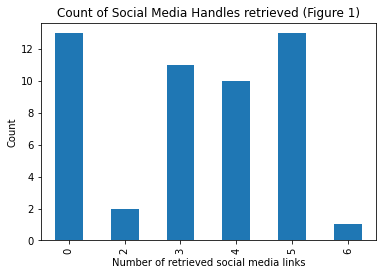

In [7]:
# Count of how many Social Links where discovered on Page
# What was the mpst number of Social Links where discovered on Page
ax = (~social_media_df_1.isna()).sum(axis=1).value_counts().sort_index().plot(kind='bar',
                                                                         sort_columns=True,
                                                                         title='Count of Social Media Handles retrieved (Figure 1)')
ax.set_xlabel("Number of retrieved social media links");
ax.set_ylabel("Count");

### Dig Deeper into domains where we only retrieved low number of social Media links (< =1)

In [8]:
df[social_media_df_1.isnull().sum(axis=1) >= 7]

,domain
2,mi.com
6,nvidia.com
8,facebook.com
9,buzzfeed.com
13,roblox.com
24,charter.com
30,crypto.com
33,onepeloton.com
38,apple.com
40,ourcrowd.com


### Page Issues and some Solutions
---------------------------------------------------------------------------------------------------------------------------

<div>
    <table style="font-size:15px; border: 1px solid black;">
        <tr>
            <th>Row</th>
            <th>Domain</th>
            <th>Website</th>
            <th>Issue</th>
            <th>Solution</th>
        </tr>
        <tr>
            <td>2</td>
            <td>mi</td>
            <td>www.mi.com</td>
            <td>This page takes a while to load</td>
            <td>A solution is to use <b>https://mi.com/global</b> and then Selenium to just extract the HTML, rather than wait</td>
        </tr>
        <tr>
            <td>6</td>
            <td>nvidia</td>
            <td>https://www.nvidia.com</td>
            <td>The social media links are not in this page</td>
            <td>A solution can be to use this page: <b>https://www.nvidia.com/en-us/</b> to get the social media links or use Selenium to load the page which autodirects to the same <b>https://www.nvidia.com/en-us/</b> and then finally scrape it</td>
        </tr>
        <tr>
            <td>8</td>
            <td>Facebook</td>
            <td>www.facebook.com</td>
            <td>No social media links found</td>
            <td>This could be because facebook on its own is a Social Media platform</td>
        </tr>
        <tr>
            <td>9</td>
            <td>Buzzfeed</td>
            <td>www.buzzfeed.com</td>
            <td>The social media links are not in this page</td>
            <td>N/A</td>
        </tr>
        <tr>
            <td>13</td>
            <td>Roblox</td>
            <td>www.roblox.com</td>
            <td>The social media links are not in this page</td>
            <td>The social media links for this page can be found at <b>https://corp.roblox.com/</b></td>
        </tr>
        <tr>
            <td>24</td>
            <td>Charter</td>
            <td>www.charter.com</td>
            <td>This page redirects to spectrum.com</td>
            <td>The scraper unofrtunately could not pick the redirect</td>
        </tr>
        <tr>
            <td>30</td>
            <td>Crypto</td>
            <td>www.crypto.com</td>
            <td>This page takes a while to load</td>
            <td>The social media links for this page can be found at <b>https://crypto.com/en/index.html</b>, so the best solution is to use that page or use Selenium which will automatically get us that page</td>
        </tr>
        <tr>
            <td>33</td>
            <td>onepeloton</td>
            <td>www.onepeloton.com</td>
            <td>Loaded with Javascript</td>
            <td>A solution is to use Selenium and just extract the HTML, rather than wait</td>
        </tr>
        <tr>
            <td>38</td>
            <td>Apple</td>
            <td>www.apple.com</td>
            <td>The social media links are not in this page</td>
            <td>N/A</td>
        </tr>
        <tr>
            <td>40</td>
            <td>ourcrowd</td>
            <td>www.ourcrowd.com</td>
            <td>Loaded with Javascript</td>
            <td>A solution is to use Selenium</td>
            <td></td>
        </tr>
        <tr>
            <td>44</td>
            <td>thecoalition</td>
            <td>www.thecoalition.com</td>
            <td>The social media links do not seem to be easily referenced using Beautifulsoup</td>
            <td>N/A</td>
        </tr>
        <tr>
            <td>48</td>
            <td>alibabagroup</td>
            <td>www.alibabagroup.com</td>
            <td>The social media links are not in this page + it takes a while to load this page</td>
            <td>The social media links for this page can be found at <b>https://alibabagroup.com/en/news/social</b>, so the best solution is to use that page or use Selenium which will automatically get us that page</td>
        </tr>
        <tr>
            <td>49</td>
            <td>whatsapp</td>
            <td>www.whatsapp.com</td>
            <td>Loaded with Javascript</td>
            <td>A solution is to use Selenium</td>
        </tr>
    </table>
</div>

In [9]:
df['new_domain'] = df.domain
df['new_domain'].iloc[2] = 'mi.com/global'
df['new_domain'].iloc[6] = 'nvidia.com/en-us'
df['new_domain'].iloc[13] = 'corp.roblox.com/'
df['new_domain'].iloc[30] = 'crypto.com/en/index.html'
df['new_domain'].iloc[48] = 'alibabagroup.com/en/news/social'

## Improving the Scraper to fix Issues discovered

- ### Beautifulsoup + Selenium

<div>
    <h3>IMPORTANT</h3>
        <p>To use Selenium, we will require a ChromeDriver. You can download the most recent ChromeDriver <a href="https://sites.google.com/a/chromium.org/chromedriver/downloads/"> here </a></p>
        <p> Make sure to note the <b>Path</b> on which it was downloaded on your machine as well </p>
</div>

Test Selenium with Sites that failed

In [10]:
from selenium.webdriver.chrome.options import Options
from selenium import webdriver

# Start Selenium using Chromium 
options = Options()
options.headless = True

# nvidia

site_list = ["http://mi.com/global", "http://antfin.com", "http://nvidia.com/en-us",
             "http://facebook.com", 
             "http://corp.roblox.com",  "http://crypto.com",
             "http://onepeloton.com", "http://ourcrowd.com",
             "http://alibabagroup.com/en/news/social", "http://whatsapp.com"]
for site in site_list:
    ans = None
    try:
        # driver = webdriver.Chrome(<-- add your Path here -->, options=options)        
        driver = webdriver.Chrome('chromedriver/chromedriver.exe', options=options)
        driver.get(site)
        time.sleep(10)

        # Get HTML on using Beautifulsoup
        soup = BeautifulSoup(driver.page_source)

        social_media_names = "facebook|twitter|youtube|instagram|linkedin|medium|weibo|snapchat"

        ans = [link.get('href') for link in soup.select('a[href]') 
               if re.search(f"[https]*:*//[www]*\.*({social_media_names})", link.get('href'))]
        driver.quit()

    except Exception as e:
        print(e)

    print(site, ":", ans)

http://mi.com/global : ['//www.youtube.com/embed/K9_g6_fqVBc', '//www.youtube.com/embed/mdxoCkZk6vU', '//www.youtube.com/embed/ADCPxT__ng4', 'https://www.facebook.com/xiaomiglobal', 'https://www.youtube.com/user/XiaomiChina', 'https://www.instagram.com/xiaomi.global/', 'https://twitter.com/Xiaomi', 'https://www.facebook.com/xiaomiglobal', 'https://www.youtube.com/user/XiaomiChina', 'https://www.instagram.com/xiaomi.global/', 'https://twitter.com/Xiaomi']
Message: timeout: Timed out receiving message from renderer: 297.155
  (Session info: headless chrome=81.0.4044.92)

http://antfin.com : None
http://nvidia.com/en-us : ['https://www.facebook.com/NVIDIA', 'https://twitter.com/nvidia', 'https://www.linkedin.com/company/nvidia/', 'https://www.instagram.com/nvidia/?hl=en', 'https://www.youtube.com/user/nvidia']
http://facebook.com : []
http://corp.roblox.com : ['http://www.facebook.com/Roblox', 'https://twitter.com/InsideRoblox', 'http://www.linkedin.com/company/147977', 'http://www.instag

So, let's add this code and make a more robust Scraper

In [11]:
def get_social_media_link(scraped_media_list: List, social_media_names: str) -> Dict:
    result = {}
    social_media_pattern = re.compile(f"({social_media_names})")
    social_media_platforms = list(filter(lambda scraped_url: re.search(social_media_pattern,
                                                                       scraped_url) , scraped_media_list))
    
    for social_media_platform in social_media_platforms:
        social_media_match = re.search(social_media_pattern, social_media_platform)
        if re.search(social_media_pattern, social_media_platform):
            result[social_media_match.group(1)] = social_media_platform.lower()

    return result

def a_href_checker(domain:str) -> Dict:
    HEADERS = {
        'User-Agent': 'Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/81.0.4044.92 Safari/537.36',
    }
    
    temp_result = {}
    response = None
    social_media_names = "facebook|twitter|youtube|instagram|linkedin|medium|weibo|snapchat"
    logging.basicConfig(filename='scraping.log', filemode='a', format='%(asctime)s - %(name)s - %(levelname)s - %(message)s')

    try:
        site_url = "https://"+ domain
        response = requests.get(site_url, allow_redirects=True, timeout=25, headers=HEADERS)
        
    except requests.exceptions.ConnectionError:
        try:
            time.sleep(2)
            site_url = "http://"+ domain
            response = requests.get(site_url, allow_redirects=True, timeout=25, headers=HEADERS)
                
        except (requests.exceptions.RequestException, Exception) as e:
            print("Error ", e)
            logging.exception(site_url)
    
    except (requests.exceptions.RequestException, Exception) as e:
        print("Error ", e)
        logging.exception(site_url)
    
    logging.shutdown()
    
    if response is not None and response.status_code == 200:
        soup = BeautifulSoup(response.text, 'html.parser') 
        page_title = soup.find('title').text

        ans = [link.get('href') for link in soup.select('a[href]') 
               if re.search(f"[https]*:*//[www]*\.*({social_media_names})", link.get('href'))]
        temp_result = get_social_media_link(ans, social_media_names)
        print(f"{site_url=}, {page_title}, {temp_result=}")
    
    final_result = {'facebook': None, "twitter":None, "youtube": None, "instagram":None
                   , "linkedin":None, "medium":None, "weibo":None, "snapchat":None}
    is_scrape_successful = False if len(temp_result) == 0 else True
    final_result.update(temp_result)
    
    return is_scrape_successful, list(final_result.values())

def a_href_checker_selenium(domain:str) -> Dict:
    # Start Selenium using Chromium 
    options = Options()
    options.headless = True
    page_title = None
    temp_result = {}
    
    social_media_names = "facebook|twitter|youtube|instagram|linkedin|medium|weibo|snapchat"
    logging.basicConfig(filename='scraping.log', filemode='a',
                        format='%(asctime)s - %(name)s - %(levelname)s - %(message)s')

    site_url = "http://" + domain
    temp_result = {}
    try:
        driver = webdriver.Chrome('chromedriver/chromedriver.exe', options=options)
        driver.get(site_url)
        time.sleep(10)

        # Get HTML on using Beautifulsoup
        soup = BeautifulSoup(driver.page_source)
        page_title = driver.title

        social_media_names = "facebook|twitter|youtube|instagram|linkedin|medium|weibo|snapchat"

        ans = [link.get('href') for link in soup.select('a[href]') 
               if re.search(f"[https]*:*//[www]*\.*({social_media_names})", link.get('href'))]
        driver.quit()
        temp_result = get_social_media_link(ans, social_media_names)
        
    except Exception as e:
        print("Error ", e)
        logging.exception(site_url)
        
    
    logging.shutdown()
    
    time.sleep(1)
    print(f"{domain}, {page_title}, {temp_result=}")
    
    final_result = {'facebook': None, "twitter":None, "youtube": None, "instagram":None
                   , "linkedin":None, "medium":None, "weibo":None, "snapchat":None}

    final_result.update(temp_result)

    return list(final_result.values())

def main_scraper(domain:str) -> Dict:
    is_scrape_successful, social_media_handles = a_href_checker(domain)
    result = None
    if is_scrape_successful:
        result = social_media_handles
    else:
        result = a_href_checker_selenium(domain)
    return result

In [ ]:
# Run Scraping on Site
social_media_df_2 = pd.DataFrame(df.new_domain.apply(main_scraper).tolist(), columns=['facebook', 'twitter', 'youtube', 'instagram', 'linkedin', 'medium', 'weibo', 'snapchat'])

In [56]:
df.join(social_media_df_2).to_csv("specter_hw/scraping_results.csv", index=False)

In [17]:
social_media_df_2

,facebook,twitter,youtube,instagram,linkedin,medium,weibo,snapchat
0,https://www.facebook.com/square,https://twitter.com/square,None,https://instagram.com/square,None,None,None,None
1,https://www.facebook.com/nih.gov,https://twitter.com/nih,https://www.youtube.com/user/nihod,https://www.instagram.com/nihgov/,None,None,None,None
2,https://www.facebook.com/xiaomiglobal,https://twitter.com/xiaomi,https://www.youtube.com/user/xiaomichina,https://www.instagram.com/xiaomi.global/,None,None,None,None
3,https://www.facebook.com/gojektech,https://twitter.com/gojektech,https://www.youtube.com/channel/ucrqzgssnyyxzh...,https://www.instagram.com/gojek.tech/,https://www.linkedin.com/company/gojektech/,None,None,None
4,None,https://twitter.com/quibi?lang=en,https://www.youtube.com/c/quibi,https://www.instagram.com/quibi/,https://www.linkedin.com/company/quibi-mobiletv,None,None,None
5,None,https://twitter.com/alipay,None,None,https://www.linkedin.com/company/167072?trk=ty...,None,http://weibo.com/xiaoweijinfu,None
6,https://www.facebook.com/nvidia,https://twitter.com/nvidia,https://www.youtube.com/user/nvidia,https://www.instagram.com/nvidia/?hl=en,https://www.linkedin.com/company/nvidia/,None,None,None
7,https://www.facebook.com/impossiblefoods/,https://twitter.com/impossiblefoods,https://www.youtube.com/channel/ucdoar7cjp7c__...,https://www.instagram.com/impossible_foods,https://www.linkedin.com/company/impossible-fo...,https://medium.com/impossible-foods,None,None
8,None,None,None,None,None,None,None,None
9,None,None,None,None,None,None,None,None


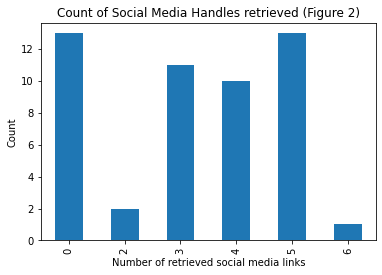

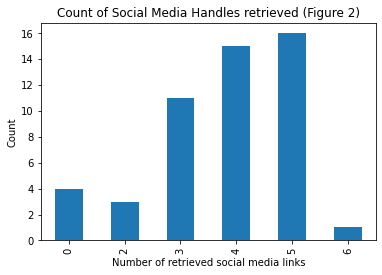

In [51]:
# Count of how many Social Links where discovered on Page
# What was the mpst number of Social Links where discovered on Page

ax_1 = (~social_media_df_1.isna()).sum(axis=1).value_counts().sort_index().plot(kind='bar',
                                                                         sort_columns=True,
                                                                         title='Count of Social Media Handles retrieved (Figure 2)')
ax_1.set_xlabel("Number of retrieved social media links");
ax_1.set_ylabel("Count");
plt.show()

ax_2 = (~social_media_df_2.isna()).sum(axis=1).value_counts().sort_index().plot(kind='bar',
                                                                         sort_columns=True,
                                                                         title='Count of Social Media Handles retrieved (Figure 2)')
ax_2.set_xlabel("Number of retrieved social media links");
ax_2.set_ylabel("Count");
plt.show()

In [53]:
df[social_media_df_2.isnull().sum(axis=1) >= 7]

,domain,new_domain
8,facebook.com,facebook.com
9,buzzfeed.com,buzzfeed.com
38,apple.com,apple.com
44,thecoalition.com,thecoalition.com


From the Above we can see that there has been a huge drop down of -4 in the websites we were unable to retrieve. These websites unfortunately do not have any social media handles present in them

# <ins>SOLUTION 2</ins>

Using a database of your choice could you create a data model of the company data and of the information we can get from TWO of the sources you just retrieved?



For this solution, I will be focusing on 2 social media data sources and they are **Linkedin** and **Facebook**. 

From Linkedin, it is possible to retrieve the following growth metrics from a Company's about page:

- Number of employees: if this is increasing this can mean that the company is growing really well. 
- Number of job openings: which can tell that a company is growing. If the numbers are really high (for example, Revolut as of now has about 262 open job positions and it recently just launched in the US), it could mean a company is trying to expand its operations perhaps in another country or take on another service. In order to fund this as well, it could mean that the company has increased revenue or recently gained funding.
- Number of followers: this can tell how well the company is known among the public. If this is increasing exponentially, it could mean the company is rapidly gaining populartiy. Also if this is decreasing, it could mean something wrong may be going on in the company.
- Funding Information: the current funding for a company, the last time it was funded and the Current Investors. However, I won't focus much on this as this information can be best gotten from Crunchbase.

From Facebook, it is possible to retrieve the following growth metrics from a Company's Homepage:

- Number of likes & Number of followers: this can tell how well the company is known among the public. If this is increasing exponentially, it could mean the company is rapidly gaining populartiy. Also if this is decreasing, it could mean something wrong may be going on in the company.
- Number of Job openings: some companies have a Job opening details in the Facebook page as well



Here is a Data Model done in a Postgres Database

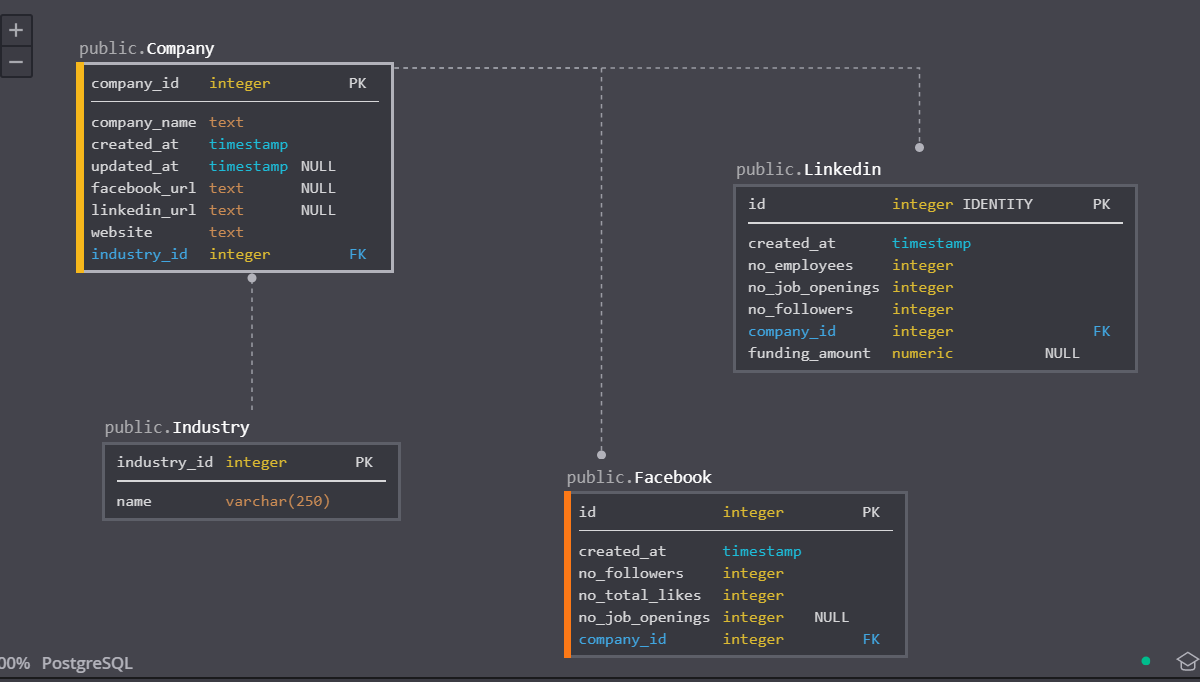

### Company Table
This model describes the relevant attributes that describes a Company from the data we can scrape.
- **company_id (*integer*)**: The unique ID that identifies a company in this Database.
- **name (*text*):** Every Company has a name to identify the company. This is unique as company names should not be repeated. It is of Text data type considering that some company names can be really long
- **created_at (*timestamp*)**: The time the Company information was first created in the Table. This is of timestamp because we are interested in the exact time the company was information was created in our Table, and it cannot be NULL.
- **updated_at (*timestamp*)**: The time the Company information was Updated in the Table. This is of timestamp because we are interested in the exact time the company was information was updated. However, this can be NULL considering that most fields may hardly change (facebook_url, linkedin_url, website) for a company.
- **facebook_url (*text*)**: The Facebook URL for the company. This is of text data type considering that URLs can vary in length, as there is really no specific length.
- **linkedin_url (*text*)**: The Linkedin URL for the company. This is of text data type considering that URLs can vary in length, as there is really no specific length.
- **website (*text*)**: The website for the particular company. This is of text data type considering that URLs can vary in length, as there is really no specific length.
- **industry_id (*integer*)**: This ID identifies the specific Industry a company can be categorized under. This cannot be NULL.

### Industry Table
Every company belongs to a particular industry. According to https://www.ilo.org/global/industries-and-sectors/lang--en/index.htm So each company on the company table is linked to the an industry type on the industry table.
- **industry_id (*integer*)**: The unique ID that identifies an Industry in this Database. This cannot be NULL and is Unique as well
- **name (*integer*)**: The name of the industry. This cannot be NULL and is Unique as well

### Facebook Table

- **created_at (*timestamp*)**: The time the Facebook information was first created in the Table. This is of timestamp because we are interested in the exact time the Facebook was information was created in our Table, and it cannot be NULL.
- **no_job_openings (integer)**: The number of Job openings on Facebook. This can be NULL as not all companies may put this on a page.
- **no_followers (integer)**: The number of Followers following a company's page
- **no_total_likes (integer)**: The number of total likes a company's page has on Facebook.
- **company_id (integer)**: This links the Linkedin information a particular Company on  the Company Table.

### Linkedin Table

- **created_at (*timestamp*)**: The time the Linkedin information was first created in the Table. This is of timestamp because we are interested in the exact time the Linkedin was information was created in our Table, and it cannot be NULL.
- **no_employees (integer)**: The number of employees employed in the company according to Linkedin.
- **no_job_openings (integer)**: The number of Job Openings currently present on the company's page on Linkedin.
- **no_followers (integer)**: The number of Followers currently following company's page on Linkedin.
- **company_id (integer)**: This links the Linkedin information a particular Company on  the Company Table.
- **funding_amount (numeric)**: This current funding for a company. This can be NULL as not all companies are funded and this information may not be captured here always.

# <ins>SOLUTION 3</ins>

How often would you update the info that you're getting from the sources you chose?

Usually, the information stored in the Company table rarely changes. So, I will not be too keen to update ths data constantly, and an update time can be once every 6 months.

I will update the Linkedin Table 2 times in a week, so as to gather fresh up-to-date information about a Company's growth. This is because, important attributes like Number of employees, or job openings should be detected regularly and .

I will update the Facebook Data 2 times in a week, so as to gather fresh up-to-date information about a Company's growth. This is because, important attributes like Number of employees, or job openings should be detected regularly.


# <ins>SOLUTION 4</ins>


What other information do you think you could get from the companies' websites in a consistent manner? How would you store it or add it to the data model?

- Most companies usually have a Careers or a Jobs page, so i can also scrape information regarding current openings from the website. This can be updated consistently.
- Some company websites have links to App stores on which the Company's app can be downloaded. I can retrieve the App Download URL from websites as well. This can be updated periodically.
- Some companies usually embed a email contact to reach out to for additional information. This can be updated periodically.

I will update the Company Table to have the following:

- app_google_play_url
- app_ios_store_url
- email

### Company Table

<div style="font-size:15px; border: 1px solid black;">
    <div style="margin-left:15px; margin-bottom:15px;">
        <ul>
        <li><b>app_google_play_url (<i>text</i>)</b>: This is the URL for the app if present on the Google Play store. This can be NULL as not all Companies have an App on Playstore.</li>
        <li><b>app_ios_store_url(<i>text</i>)</b>: This is the URL for the app if present on the IOS store. This can be NULL as not all Companies have an App on IOS.</li>
        <li><b>email (<i>varchar(250)</i>)</b>: This stores the contact email found on a Company's website.</li>
        </ul>
    </div>
</div>

- **company_id (*integer*)**: The unique ID that identifies a company in this Database.
- **name (*text*):** Every Company has a name to identify the company. This is unique as company names should not be repeated. It is of Text data type considering that some company names can be really long
- **created_at (*timestamp*)**: The time the Company information was first created in the Table. This is of timestamp because we are interested in the exact time the company was information was created in our Table, and it cannot be NULL.
- **updated_at (*timestamp*)**: The time the Company information was Updated in the Table. This is of timestamp because we are interested in the exact time the company was information was updated. However, this can be NULL considering that most fields may hardly change (facebook_url, linkedin_url, website) for a company.
- **facebook_url (*text*)**: The Facebook URL for the company. This is of text data type considering that URLs can vary in length, as there is really no specific length.
- **linkedin_url (*text*)**: The Linkedin URL for the company. This is of text data type considering that URLs can vary in length, as there is really no specific length.
- **website (*text*)**: The website for the particular company. This is of text data type considering that URLs can vary in length, as there is really no specific length.
- **industry_id (*integer*)**: This ID identifies the specific Industry a company can be categorized under. This cannot be NULL.

The following information is information that can be updated periodically

### Scraped_Company_Data Table

- **created_at (*timestamp*)**: The time the Linkedin information was first created in the Table. This is of timestamp because we are interested in the exact time the Linkedin was information was created in our Table, and it cannot be NULL.
- **no_job_openings (integer)**: The number of Job Openings currently present on the company's website.


# Scraping Limitations (Robots.txt)



Before Scraping website pages, it is important to highlight that most sites have limitations on pages and what can be scraped. This can save us from Possible Legal cases from companies whose data we scrape, or banning of our IPs. This information is usually found in a "robots.txt" file

To access this file (if present), simply do:

    https://<domain>/robots.txt
    
For example,

- Facebook's robots.txt page can be accessed here:

    https://facebook.com/robots.txt


- Medium's robots.txt page can be accessed here:

    https://medium.com/robots.txt
    
## Future work
- Build a Crawler to crawl a domains.
- Modify the Scrapers to automatically detect if a page should be crawled or not from the Robots.txt page. For this, we can utilize a  library called protego, and then we can tell if a particular page should be scraped.
- Scrape other sites like crunchbase for funding and more information about company